## Chapter4.3 パーセプトロン

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

簡単なデータセットを作ります

In [2]:
X_dataset = [[0.4, 0.4],
             [-0.2, 0.3],
             [0.3, -0.1],
             [-0.4, -0.4],
             [-0.2, -0.3],
             [-0.5, 0.2]]
y_dataset = [1, 1, 1, -1, -1, -1]

dataset = pd.DataFrame(X_dataset, columns=['x0', 'x1'])
dataset['y'] = y_dataset
dataset

,x0,x1,y
0,0.4,0.4,1
1,-0.2,0.3,1
2,0.3,-0.1,1
3,-0.4,-0.4,-1
4,-0.2,-0.3,-1
5,-0.5,0.2,-1


プロット用の関数を定義します

In [3]:
def plot_dataset(dataset):
    fig, ax = plt.subplots()
    for key, g in dataset.groupby('y'):
        color = 'k' if key == 1 else 'w'
        g.plot(ax=ax, kind='scatter', x='x0', y='x1',
               label=key, color=color,
               edgecolor='black', linewidth='1',
               xlim=(-1, 1), ylim=(-1, 1))
    return fig, ax


def plot_boundary(m, n, c, bias):
    x = np.array(range(-2, 2))
    y = eval('%f*x + %f' % ((-m / (n + 1e-6)), (-c * bias / (n + 1e-6))))
    plt.plot(x, y)

パーセプトロンの学習を実行します

(0.0, 0.0, 1.0, 0.0, 0.29999999999999999, -0.10000000000000001)
(0.0, 0.29999999999999999, 0.90000000000000002, 0.0, -0.5, 0.20000000000000001)
(0.0, 0.80000000000000004, 0.69999999999999996, 0.0)


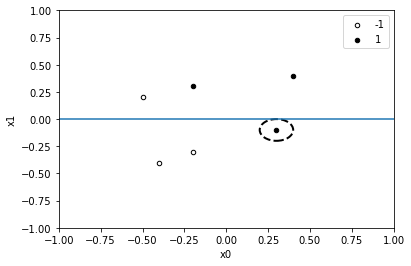

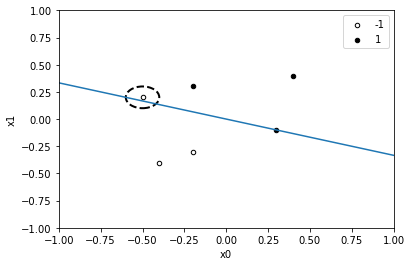

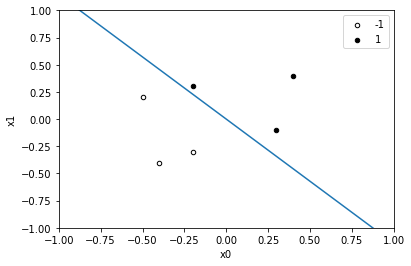

In [4]:
def train(dataset, epochs=1):
    learning_rate = 1.0
    bias = 0.0
    c = 0.0
    m = 0.0
    n = 1.0
    for epoch in range(epochs):
        for i, (x0, x1, y) in dataset.iterrows():
            if y * (m * x0 + n * x1 + bias * c) > 0:
                pass  # 合っているので何もしない
            else:
                print(c, m, n, bias, x0, x1)
                fig, ax = plot_dataset(dataset)
                plot_boundary(m, n, c, bias)

                # 間違っている点をプロット
                circle1 = plt.Circle((x0, x1), 0.1,
                                     fill=False, linestyle='dashed', linewidth=2)
                ax.add_patch(circle1)

                c += learning_rate * y * bias
                m += learning_rate * y * x0
                n += learning_rate * y * x1

    print(c, m, n, bias)
    return m, n


m, n = train(dataset=dataset,
             epochs=5)

plot_dataset(dataset)
plot_boundary(m, n, c=0.0, bias=0.0)

計算を`np.dot`を使った方法に書き換えます

In [5]:
def train(dataset, epochs=1):
    learning_rate = 1.0
    w = np.array([0.0, 0.0, 1.0])  # 初期値
    for epoch in range(epochs):
        for i, (x0, x1, y) in dataset.iterrows():
            x = np.array([1.0, x0, x1])
            if y * np.dot(w, x) > 0:
                pass  # 合っているので何もしない
            else:
                w += learning_rate * y * x

    return w

識別境界が原点を通らないデータセットを作成

In [6]:
from sklearn.datasets import make_blobs

X_dataset, y_dataset = make_blobs(centers=[[-0.25, 0.5], [0.15, -0.2]],
                                  cluster_std=0.2,
                                  n_samples=20,
                                  center_box=(-1.0, 1.0),
                                  random_state=42)
dataset = pd.DataFrame(X_dataset, columns=['x0', 'x1'])
dataset['y'] = y_dataset
dataset['y'] = dataset.y.apply(lambda x: 1 if x == 1 else -1)

学習して識別境界をプロットします

[ 1.          3.75121666 -2.28978906]


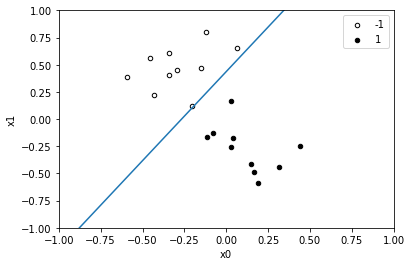

In [7]:
w = train(dataset=dataset,
          epochs=20)
print(w)
plot_dataset(dataset)
plot_boundary(w[1], w[2], w[0], 1.0)